In [1]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import os
import pandas as pd
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [2]:
% matplotlib inline
mpl.style.use('ggplot')

path='/Users/brianna/Documents/WL_DBdeets/'

In [23]:
# Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

features = ['NumberSignedUpFromCompany',
          'MeetingsTotalWeek0_i',
          'PortionOfOrganizerWeek0_i',
          'AveNumAttendeesWeek0_i',
          'added_meetingWeek0_i',
          'added_agenda_itemWeek0_i',
          'assigned_action_itemWeek0_i',
          'EmailCorporateVsPrivate']

prediction = 'RetentionStatus4Levels'

In [24]:
#modelData = pd.read_csv(path+'06_DataFinal.csv')
modelData = pd.read_csv(path+'06_DataFinal.csv')

# Remove all rows with null values and see how many rows you have left.
columns = features[:]
columns.append(prediction)
print('Columns remaining after rows with NA\'s removed: '+str(len(modelData.dropna(subset=columns))))
modelData=modelData.dropna(subset=columns)
modelData[columns].head()

X = modelData[features]
#y = modelData[prediction].values
#n_classes=2

Columns remaining after rows with NA's removed: 6435


In [25]:
# Binarize the output
y = label_binarize(modelData[prediction].values, classes=[0, 1, 2,3])
n_classes = y.shape[1]


In [26]:
# shuffle and split training and test sets (leave out 50% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.50,random_state=0)

# Learn to predict each class against the other
#classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,random_state=0))
classifier = RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_leaf=5)
#y_score = classifier.fit(X_train, y_train).decision_function(X_test)

classifier.verbose = True
classifier.n_jobs = -1 # do as many jobs as there's room for on the computer
classifier.fit(X_train, y_train)

# Predictions:
y_score = classifier.predict(X_test)
#classifier.fit

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.4s finished


In [27]:
print(len(y_score.ravel()))
print(len(y_test.ravel()))

12872
12872


In [28]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

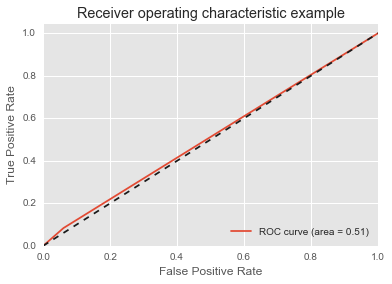

In [29]:
##############################################################################
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()